# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_e(t,u) = x(t,u)e(t,u)\quad \text{with}\quad e(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_e,u - lT_e)
$$ $e$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_e$ writes:
$$
X_e(f,g) = \frac1{T_e^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_e,g-lf_e)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_e(kT_e,lT_e) \operatorname{sinc}(\pi f_e (t-kT_e)) \operatorname{sinc}(\pi f_e(u - lT_e))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercice 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>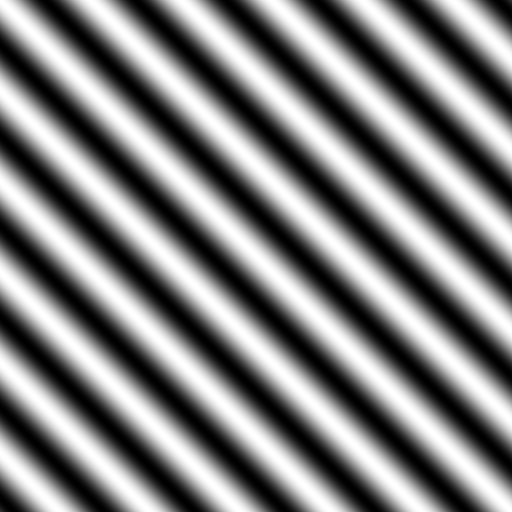</div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.

In [1]:
import numpy as np
from numpy.fft import fft2, fftshift, fftfreq, ifft2
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
%matplotlib inline 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Te, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Te-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Te-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()

1. We provide the function `sinusoid2d(A, theta, L, T0, Te)` that allows to sample signal $s_\theta$ with a sampling period of `Te` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Te=1`.


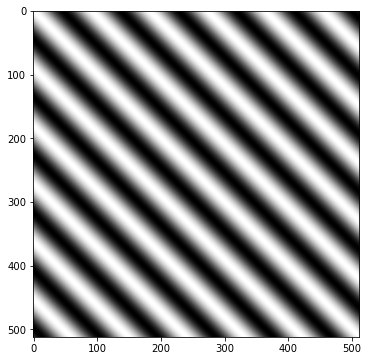

In [2]:
s45 = sinusoid2d(1,45,512,64,1)
imshow(s45)

2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

soit  $h(t,u)$la valeur correspondant au pixel de coordonnées t,u
$$
 FT(h)(f,g) =\frac A{2} \delta_\frac {e_t}{T_0}(f)\delta_\frac {s_t}{T_0}(g)+ \frac A{2} \delta_\frac {-e_t}{T_0}(f)\delta_\frac {-s_t}{T_0}(g)
 $$
Donc $f_{t}^{max}=max(|c_t/T_0|,|-c_t/T_0|)=|c_t/T_0| $

Et donc on à symetriquement pour $f_{u}^{max}=\frac {s_t}{T_0}$

On peux conclure que $fm=max(s_t,c_t)f_0$ et que pour ces valeurs,$ sin(\theta )$ et $cos(\theta)$ sont egaux on obtient donc $f_m=\frac{\sqrt{2}}{2}f_0$

In [3]:
f_m = (1/64) * (np.sqrt(2))/2 # sqrt(2)/2 = cos(45) = sin(45) dont f_m est la même valeur que l'on prenne f_u ou f_t
print(f_m)

0.011048543456039806


2. (b)  Sample $s_{45}$ with $f_e = 16 f_m$ and display the sampled signal.

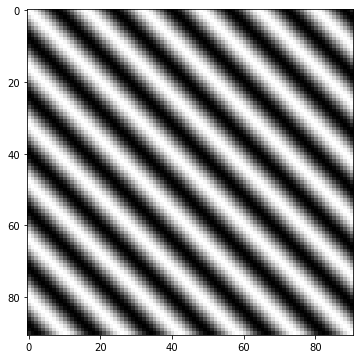

In [4]:
sampled_s45 = sinusoid2d(1,45,512,64,(1/(16*f_m)))
imshow(sampled_s45)

2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use surf() function for an interactive 3D plot.

In [5]:
def thresholdImage(I,s):
    return np.where((I<s),0,255)
    """ Array*int -> Array """

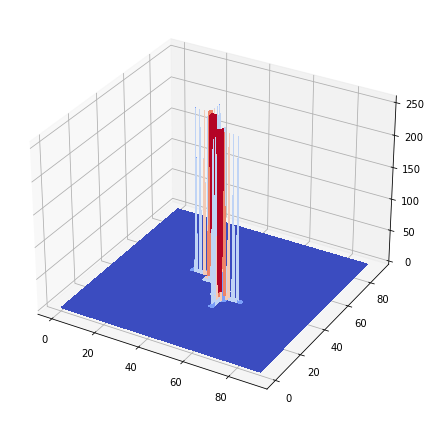

In [6]:
threshold = 100
ft_sampled_s45 = fft2(sampled_s45)
shift_ft_sampled_s45 = fftshift(ft_sampled_s45)
tr_shift_ft_sampled_s45 = thresholdImage(shift_ft_sampled_s45, threshold)
surf(tr_shift_ft_sampled_s45)

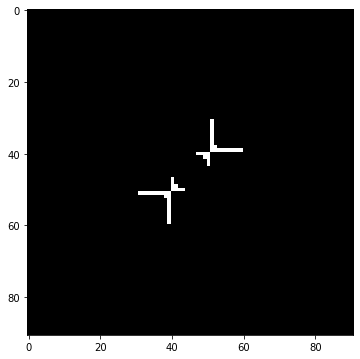

In [7]:
imshow(tr_shift_ft_sampled_s45)

2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_e$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

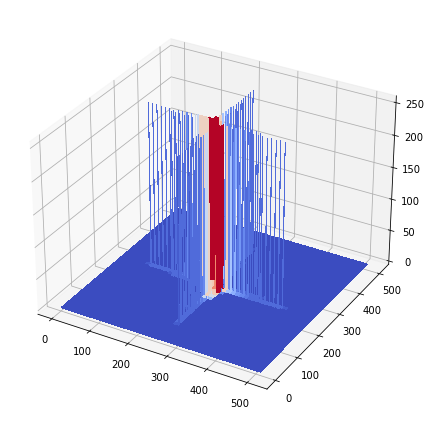

In [8]:
threshold = 100

ft_s45 = fft2(s45)
shift_ft_s45 = fftshift(ft_s45)
tr_shift_ft_s45 = thresholdImage(shift_ft_s45, threshold)
surf(tr_shift_ft_s45)

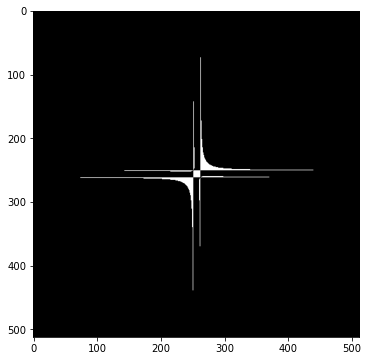

In [9]:
imshow(tr_shift_ft_s45)

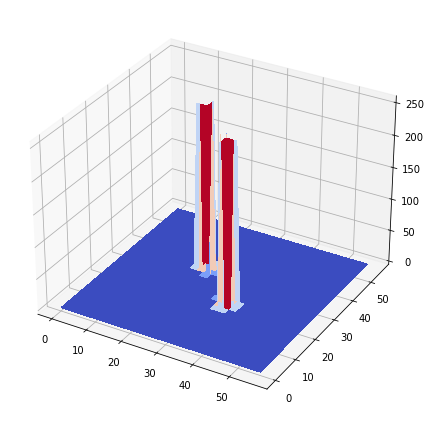

In [10]:
threshold = 100
s45bis=sinusoid2d(1,45,512,64,9) # 9 : Periode d'echantillonage forte
ft_s45bis = fft2(s45bis)
shift_ft_s45bis = fftshift(ft_s45bis)
tr_shift_ft_s45bis = thresholdImage(shift_ft_s45bis , threshold)
surf(tr_shift_ft_s45bis)

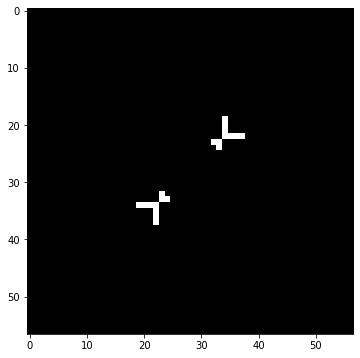

In [11]:
imshow(tr_shift_ft_s45bis)

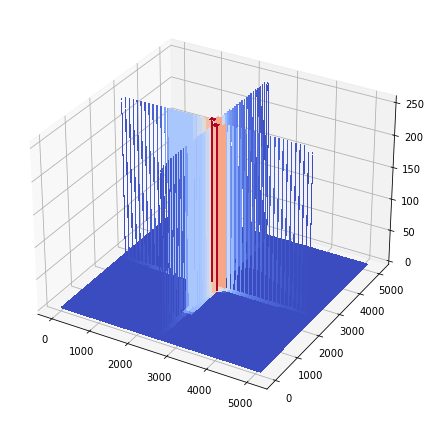

In [12]:
threshold = 100
s45bis=sinusoid2d(1,45,512,64,0.1) # 0.1 : Periode d'echantillonage faible
ft_s45bis = fft2(s45bis)
shift_ft_s45bis = fftshift(ft_s45bis)
tr_shift_ft_s45bis = thresholdImage(shift_ft_s45bis , threshold)
surf(tr_shift_ft_s45bis)

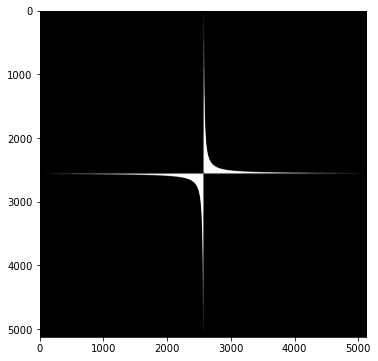

In [13]:
imshow(tr_shift_ft_s45bis)

In [14]:
# Il y a bien 2 dirac.



# Plus on augmente la periode d'echantillonage, plus on perd de l'information.
# On observe qu'avec une petite periode d'echantillonage donc une grande frequence d'echantillonage, le spectre 2D est beaucoup plus lisse.
# Il semble y avoir plus de diversite de basse/haute frequence, ce qui se traduit par un signal qui semble plus lisse et etendu.



# Apparition d'une forme qui lorsque Te devient grand pars aved le dirac

# 

3. (a) Sample $s_{45}$ with $f_0=4 f_m$ and display the sampled signal.

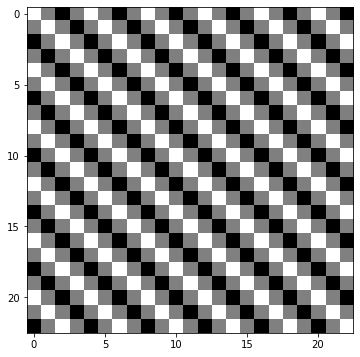

In [15]:
sampled_s45 = sinusoid2d(1,45,512,64,1/(4*f_m))
imshow(sampled_s45)

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [16]:
A = 1
L = 512 

def error(s1, s2):
    return 1/(2*A*L**2) * np.sum(np.abs(s1-s2))

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

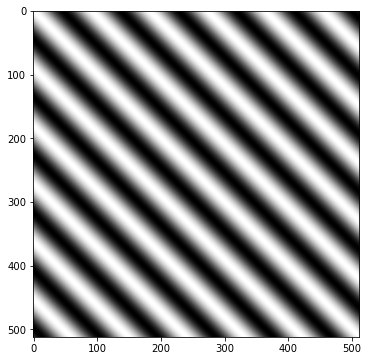

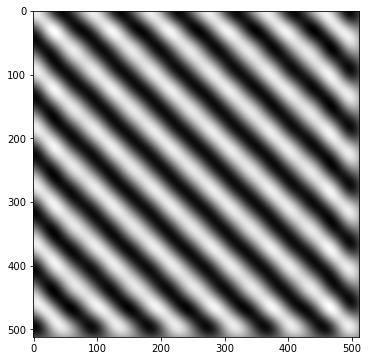

0.022936924363103007


In [17]:
sampled_s45 = sinusoid2d(1,45,512,64,1/(4*f_m))
s45_rec = shannonInterpolation(sampled_s45, 1/(4*f_m), 512)
s45 = sinusoid2d(1,45,512,64,1)
imshow(s45)
imshow(s45_rec)
print(error(s45, s45_rec))

In [18]:
# Reconstruction plutot satisfaisante, sauf au niveau des bords de l'image car l'interpolation de shannon
# n'a pas bien fonctionne sur les bords de l'image car manque de pixel environnant pour renconstruire l'image.
# Cela explique le taux d'erreur non nul.

4. Same question than 3. with $f_e = \frac32f_m$. Comment the effects of aliasing.

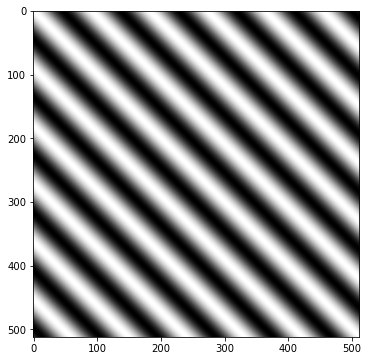

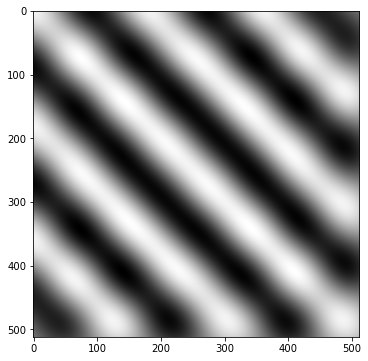

0.4068626475014588


In [19]:
sampled_s45 = sinusoid2d(1,45,512,64,1/(1.5*f_m))
s45_rec = shannonInterpolation(sampled_s45, 1/(1.5*f_m), 512)
s45 = sinusoid2d(1,45,512,64,1)
imshow(s45)
imshow(s45_rec)
print(error(s45, s45_rec))

In [20]:
# Avec une frequence d'echantillonage 3/2fe on est inferieur a 2fe, lors de la reconstruction on voit donc
# qu'il y a un taux d'erreur 20 fois plus eleve pour 3/2fe, compare a 4fe.
# le probleme n'est pas seulement la qualite de l'image reconstruite, mais elle se traduit aussi par une
# perte importante d'information, ici on voit que l'image n'est plus du tout la meme apres reconstruction

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_e$ what is the additional drawback appearing after the reconstruction? Explain.

In [21]:
newf=1/64*max(abs(np.cos(10)),abs(np.sin(10)))
print(newf)

0.01311049264181957


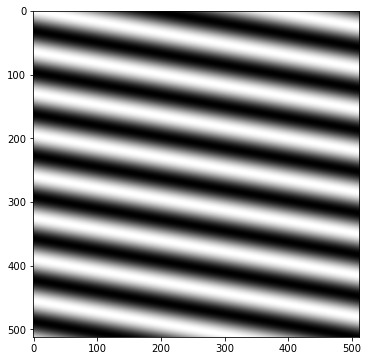

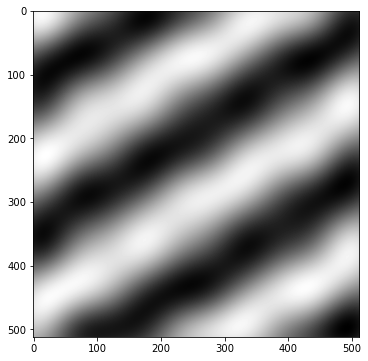

0.4070386795390057


In [22]:
s10_sampled = sinusoid2d(1,10,512,64,1/(1.5*newf))
s10_rec = shannonInterpolation(s10_sampled, 1/(1.5*newf), 512)
s10 = sinusoid2d(1,10,512,64,1)

imshow(s10)
imshow(s10_rec)
print(error(s10, s10_rec))

In [23]:
# Ici la perte d'information est enorme, lors de la reconstruction nous n'avons plus le meme nombre de ligne, 
# ni le meme angle, les lignes ne sont plus droites etc...

6. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [213]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

def shannonInterpolationLoop(I_sampled, Te, size, n_loop):
    tic()
    for i in range(n_loop):
        I_sampled = shannonInterpolation(I_sampled, Te, size)
    tac()
    return I_sampled

def shannonInterpolation(I, Te, size):
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    print("x:",x.shape)
    print("y:",y.shape)
    Y = np.sinc(x/Te-y)
    print("Y:",Y.shape)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Te-y)
    print("X:",X.shape)
    print("X.T:", X.T.shape)
    print("I:", I.shape)
    print("Y:", Y.shape)
    print("res:", np.matmul(X.T, np.matmul(I, Y)).shape)
    return np.matmul(X.T, np.matmul(I, Y))

def matmultiplication(A, B):
    ra, ca = len(A), len(A[0])
    rb, cb = len(B), len(B[0])
    X = [[0] * cb for i in range(ra)]
    for i in range(ra):
        for j in range(cb):
            for k in range(rb):
                X[i][j] += A[i][k] * B[k][j] 
    return X

def matdivision(A, B):
    ra, ca = len(A), len(A[0])
    rb, cb = len(B), len(B[0])
    X = [[0] * cb for i in range(ra)]
    for i in range(ra):
        for j in range(cb):
            for k in range(rb):
                X[i][j] += A[i][k] / B[k][j] 
    return X
    
def transpose(A):
    n = len(A)
    m = len(A[0])
    X = [[0] * n for i in range(m)]
    for i in range(n):
        for j in range(m):
            X[j][i] = A[i][j]
    return X

def manualShannonInterpolationLoop(I_sampled, Te, size, n_loop):
    tic()
    for i in range(n_loop):
        I_sampled = manualShannonInterpolation(I_sampled, Te, size)
    tac()
    return I_sampled

def manualShannonInterpolation(I_sampled, Te, size):
    n, m = len(I_sampled), len(I_sampled[0])
    x = [[0] * size for i in range(n)]
    for j in range(n):
        for k in range(size):
            x[j][k] = k      
    y = [[0] * size for i in range(n)]
    for j in range(n):
        for k in range(size):
            y[j][k] = j
    Y = [[0] * size for i in range(n)]
    
#     for j in range(n):
#         for k in range(size):
#             sin = 4*j*(180-j)/(40500 - j*(180-j)) # Approximation de sin()
#             sinc = sin/j
#             Y[j][k] = sinc*(x[j][k]/Te-y[j][k])  
            
#             u = x[j][k]/Te-y[k][j]
#             sin_u = 4*u*(180-u)/(40500 - u*(180-u)) # Approximation de sin()
#             sinc_u = sin_u/u
#             Y[j][k] = sinc_u
                
#     u = x/Te - y
#     for j in range(n):
#         for k in range(size):
#             Y[j][k] = np.sinc(u)

    u = x/Te - y
    Y = np.sinc(u) # Fonctionne avec ca il faut debug au dessus

    print("x:",np.array(x).shape)
    print("y:",np.array(y).shape)
    print("Y:",np.array(Y).shape)
    x = [[0] * size for i in range(m)]
    for j in range(m):
        for k in range(size):
            x[j][k] = k       
    y = [[0] * size for i in range(m)]
    for j in range(m):
        for k in range(size):
            y[j][k] = j         
    X = [[0] * size for i in range(m)]
    
    u = x/Te - y 
    X = np.sinc(x/Te-y)
    
    print("X:",np.array(X).shape)
    print("X.T:",np.array(transpose(X)).shape)
    print("I:",I_sampled.shape)
    print("Y:",np.array(Y).shape)
    res = matmultiplication(transpose(X), matmultiplication(I_sampled, Y))
#     print("res:",res)
    return np.array(res)

In [214]:
Xt = [[1,2,3],
    [4 ,5,6]]
  
Yt = [[9,8,7],
    [6,5,4],
    [3,2,1]]

res1 = np.matmul(Xt,Yt)
res2 = matmultiplication(Xt,Yt)
print(res1==res2)

res1 = np.array(Xt).T
res2 = transpose(Xt)
print(res1==res2)

[[ True  True  True]
 [ True  True  True]]
[[ True  True]
 [ True  True]
 [ True  True]]


In [212]:
size = 64

s10_sampled = sinusoid2d(1,10,64,size,1/(4*newf))
rec1 = shannonInterpolationLoop(s10_sampled, 1/(4*newf), size, 1)
print("recons:", rec1.shape)
print(rec1.sum())
# print(rec1)

print("=======================================================================")

s10_sampled = sinusoid2d(1,10,64,size,1/(4*newf))
rec2 = manualShannonInterpolationLoop(s10_sampled, 1/(4*newf), size, 1)
print("recons:", rec2.shape)
print(rec2.sum())
# print(rec2)

print("=======================================================================")

epsilon = 1e-1
test = np.zeros((rec1.shape[0], rec1.shape[1]))
for i in range(rec1.shape[0]):
    for j in range(rec1.shape[1]):
        if np.abs(rec1[i][j] - rec2[i][j]) < epsilon:
            test[i][j] = 1
print(test.mean())

x: (4, 512)
y: (4, 512)
Y: (4, 512)
X: (4, 512)
X.T: (512, 4)
I: (4, 4)
Y: (4, 512)
res: (512, 512)
0.0
recons: (512, 512)
4339.945223240939
x: (4, 512)
y: (4, 512)
Y: (4, 512)
X: (4, 512)
X.T: (512, 4)
I: (4, 4)
Y: (4, 512)
0.546875
recons: (512, 512)
4339.945223240939
1.0
En codant c'est 769.953125


In [215]:
# En le codant en C c'est beaucoup plus long !

## Exercice 2: aliasing on natural images

In this exercice, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

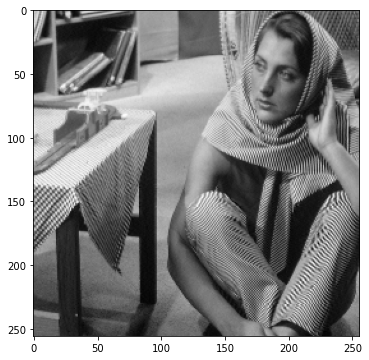

In [27]:
from PIL import Image

barbara = np.array(Image.open('img/barbara.png'))

def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

barbara2=subSample2(barbara)
imshow(barbara2)

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

In [28]:
# On garde seulement un pixel sur deux pour chaque axes, ce qui fait qu'on garde un pixel sur 4 de l'image.

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

(256, 256)
(128, 128)
(64, 64)
(32, 32)
(16, 16)
(8, 8)
(4, 4)
(2, 2)
(1, 1)


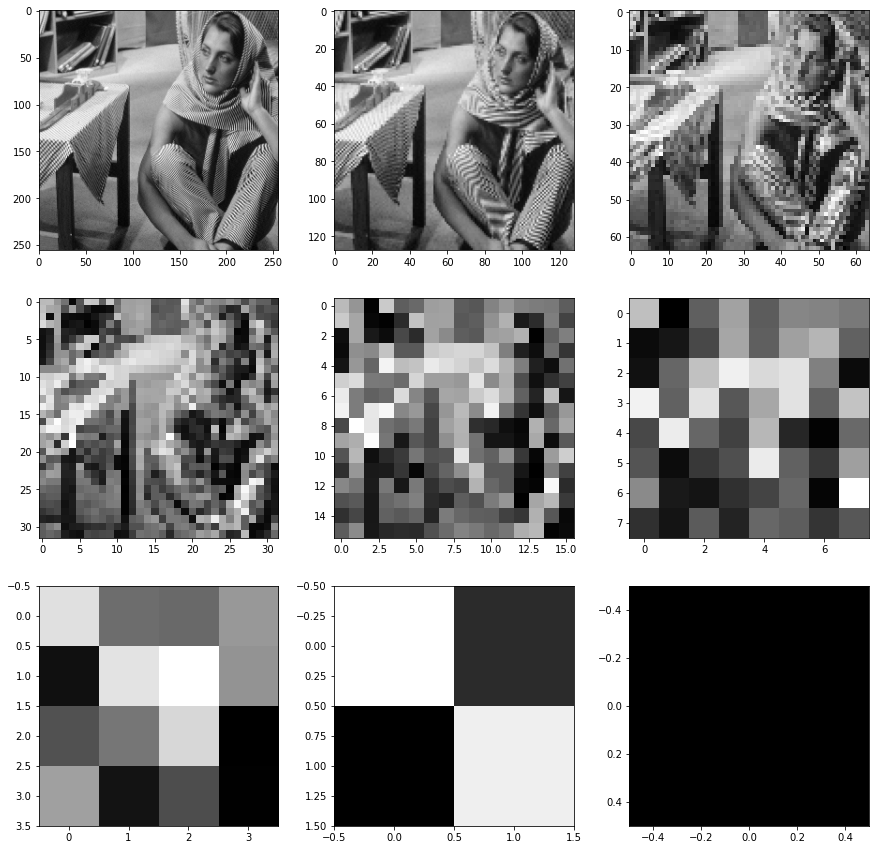

In [29]:
n=9
threshold=1e5
barbara3=barbara
barbaralist=[]
fig=plt.figure(figsize=(15,15))

for i in range(1,n+1):
    fig.add_subplot(int(np.sqrt(n)),int(np.sqrt(n)),i)
    barbara3=subSample2(barbara3)
    print(barbara3.shape)
    plt.imshow(barbara3)

In [30]:
# On voit qu'apres seulement quelques iterations on perd toute l'information contenu dans l'image.
# En seulement 9 iteration l'image est completement detruite car on a diviser le nombre de pixel par 4, 9 fois.

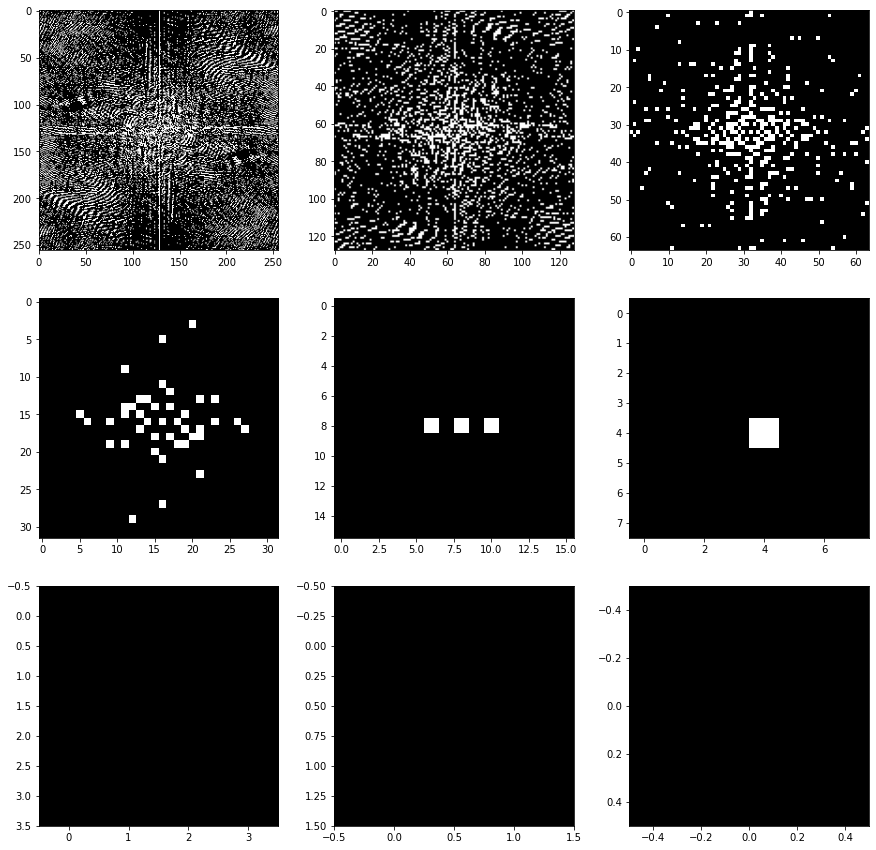

In [31]:
n=9
threshold=1e5
barbara3=barbara
fig=plt.figure(figsize=(15,15))

for i in range(1,n+1):
    fig.add_subplot(int(np.sqrt(n)),int(np.sqrt(n)),i)
    barbara3=subSample2(barbara3)
    ft_barbara3=fft2(barbara3)
    ft_barbara3=fftshift(ft_barbara3)
    plt.imshow(thresholdImage(ft_barbara3*50, threshold))    

In [32]:
# On voit que l'informations concernant les frequences disparait tres rapidemment avec les iterations.

3. Bonus question: same question with the image `img/mandrill.png`.

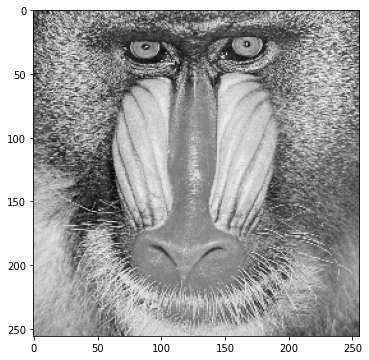

In [33]:
mandrill = np.array(Image.open('img/mandrill.png'))
mandrill2 = subSample2(mandrill)
imshow(mandrill2)

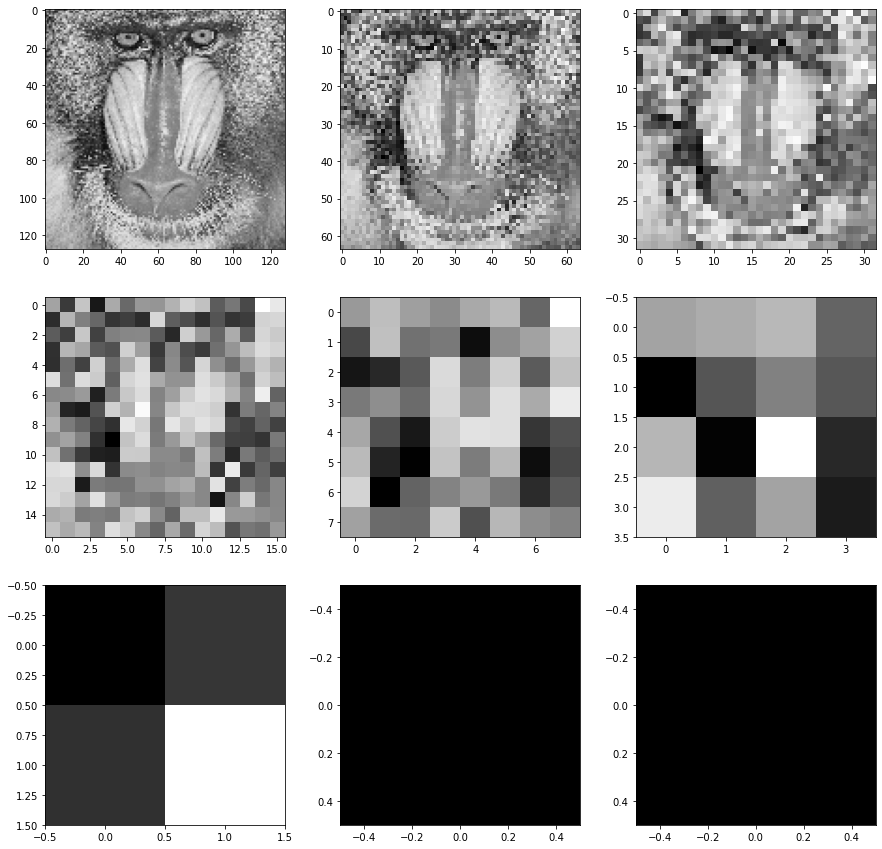

In [34]:
n=9

fig=plt.figure(figsize=(15,15))

sampled_singe = []

for i in range(1,n+1):
    fig.add_subplot(int(np.sqrt(n)),int(np.sqrt(n)),i)
    mandrill2 = subSample2(mandrill2)
    if i == 3:
        sampled_singe = mandrill2
    plt.imshow(mandrill2)

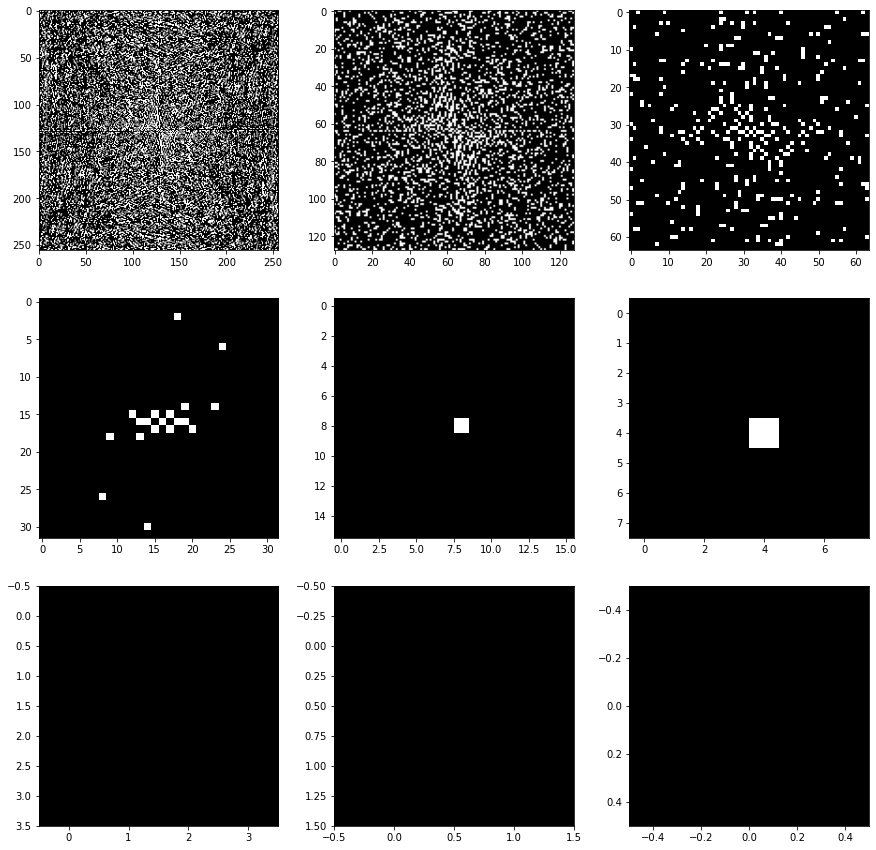

In [35]:
mandrill2 = mandrill
fig = plt.figure(figsize=(15,15))

for i in range(1, n+1):
    fig.add_subplot(int(np.sqrt(n)), int(np.sqrt(n)),i)
    mandrill2 = subSample2(mandrill2)
    ft_mandrill2 = fft2(mandrill2)
    ft_mandrill2 = fftshift(ft_mandrill2)
    plt.imshow(thresholdImage(50*ft_mandrill2, threshold)) 

## Exercice supplémentaires : Utilisation du zero padding pour interpolation de shannon plus efficace

x: (27, 512)
y: (27, 512)
Y: (27, 512)
X: (27, 512)
X.T: (512, 27)
I: (27, 27)
Y: (27, 512)
res: (512, 512)


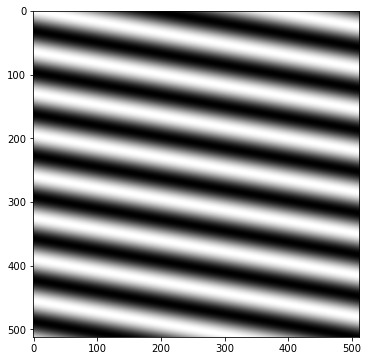

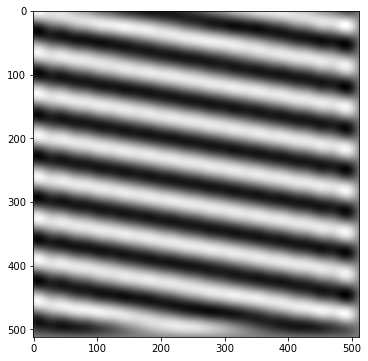

0.022190997137845864


In [36]:
s10_sampled = sinusoid2d(1,10,512,64,1/(4*newf))
s10_rec = shannonInterpolation(s10_sampled, 1/(4*newf), 512)
s10 = sinusoid2d(1,10,512,64,1)
imshow(s10)
imshow(s10_rec)
print(error(s10, s10_rec))

In [37]:
def zero_padding(I, p):
    (n_x, n_y) = I.shape
    new_img = np.zeros((n_x+(p*2), n_y+(p*2)))
    for x in range((n_x+(p*2))):
        for y in range(n_y+(p*2)):
            if x > p and x < n_x + p:
                if y > p and y < n_y + p:
#                     print("x:",x)
#                     print("y:",y)
#                     print("x2:",x+(p*2))
#                     print("y2:",y+(p*2))
                    new_img[x][y] = I[x-p][y-p]
    return new_img   

In [38]:
padding = 2
s10_pad = zero_padding(s10_sampled, padding)
# print(s10_pad)

In [39]:
print(s10_sampled.shape)
print(s10_pad.shape)

(27, 27)
(31, 31)


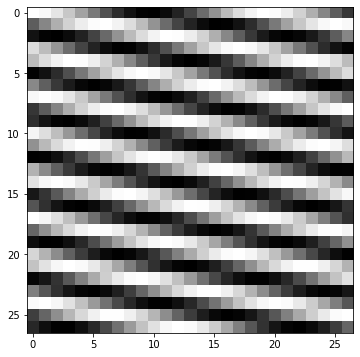

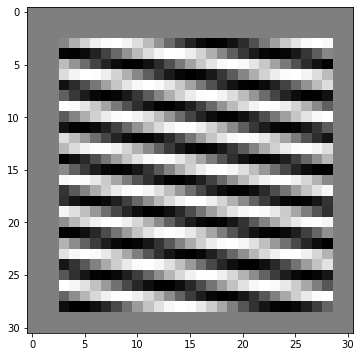

In [40]:
imshow(s10_sampled)
imshow(s10_pad)

x: (27, 512)
y: (27, 512)
Y: (27, 512)
X: (27, 512)
X.T: (512, 27)
I: (27, 27)
Y: (27, 512)
res: (512, 512)
x: (31, 600)
y: (31, 600)
Y: (31, 600)
X: (31, 600)
X.T: (600, 31)
I: (31, 31)
Y: (31, 600)
res: (600, 600)
(512, 512)
(512, 512)
(600, 600)


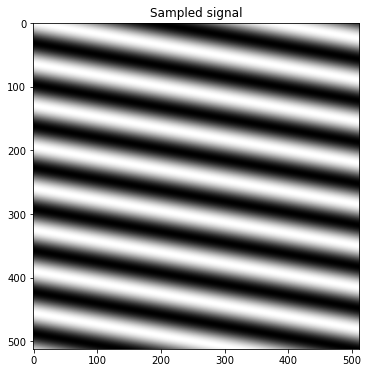

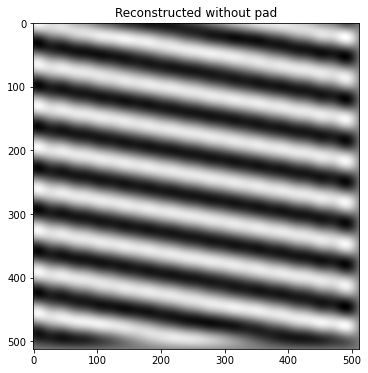

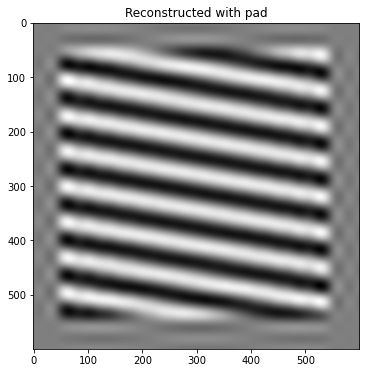

In [41]:
s10_rec = shannonInterpolation(s10_sampled, 1/(4*newf), 512)
s10_rec_pad = shannonInterpolation(s10_pad, 1/(4*newf), 600)

# s10_rec_pad = s10_rec_pad[padding:512+padding, padding:padding+512]

print(s10.shape)
print(s10_rec.shape)
print(s10_rec_pad.shape)

# print("Error without pad:",error(s10, s10_rec))
# print("Error with pad   :",error(s10, s10_rec_pad)) # Il faudrait changer la fonction shannonInterpolation() pour pouvoir compute l'erreur

imshow(s10, "Sampled signal")
imshow(s10_rec, "Reconstructed without pad")
imshow(s10_rec_pad, "Reconstructed with pad")

In [42]:
# On voit que les bords de l'image sont mieux reconstruit en utilisant un zero padding.
# On peut voir des signes d'interpolation entre l'image et les pixels noirs sur les bords.

## Exercice supplémentaires : Reconstruction de signal samplé en utilisant le machine learning

In [43]:
# Il faut d'abord recuperer un dataset d'image
# Il faut ensuite normaliser ces images et on les gardera pour etre notre Y_train
# On construit notre dataset X_train avec la fonction subSample2()
# On construit le model qui va interpoler de X_train à Y_train

In [44]:
import tensorflow as tf
import pandas as pd

In [45]:
# Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist           # Librairie dataset
(images, _), (images_test, _) = fashion_mnist.load_data() # On ignore les informations avec _
images = images[:10000]                                   # On ne prend pas tout le dataset pour aller plus vite

# Normalisation des valeurs de 0 a 255 => 0 a 1
from sklearn.preprocessing import StandardScaler
print("Avant normalisation :")
print("Moyenne valeur pixel: ", images.mean())   # On voit que ces deux valeurs sont beaucoup
print("Ecart type valeur pixel: ", images.std()) # trop eleves, il faut donc normaliser
images = images.reshape(-1, 784)                 # On flatten les images en entree 2D => 1D
images = images.astype(float)                    # On definit les valeurs comme etant des float
scaler = StandardScaler()                        # StandardScaler est une fonction de normalisation qui diminue l'ecart type des valeurs
images = scaler.fit_transform(images)
print()
print("Apres normalisation :")
print("Moyenne valeur pixel: ", images.mean())   # On voit que ces deux valeurs ont bien
print("Ecart type valeur pixel: ", images.std()) # change et que la normalisation a eu lieu

# Affichage de nos shape
print("\nShape des images : ", images.shape)

n_pixel = images.shape[1]
n_sample_factor = 2

Avant normalisation :
Moyenne valeur pixel:  73.00877385204082
Ecart type valeur pixel:  90.2745808471392

Apres normalisation :
Moyenne valeur pixel:  -1.0476880134421886e-18
Ecart type valeur pixel:  1.0000000000000007

Shape des images :  (10000, 784)


In [46]:
from sklearn.model_selection import train_test_split
Y_train, Y_test = train_test_split(images, test_size=0.2, random_state=1) # 0.2 signifie 20% pour le test set
print("Train set images shape : ", Y_train.shape)
print("Test set images shape : ", Y_test.shape)

Train set images shape :  (8000, 784)
Test set images shape :  (2000, 784)


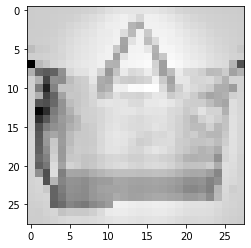

In [47]:
plt.imshow(np.reshape(Y_train[6], (28, 28)), cmap="binary") # On precise avec "binary" que nous somme sur une image en noir et blanc
plt.show()

In [48]:
def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

In [49]:
X_train = np.zeros((Y_train.shape[0], int(Y_train.shape[1]/(n_sample_factor*2)))) # Division par n_sample*2 car division par 4 du nombre de pixel
X_test = np.zeros((Y_test.shape[0], int(Y_test.shape[1]/(n_sample_factor*2))))

print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

for i in range(len(X_train)):
    X_train[i] = subSample2(Y_train[i].reshape(28,28)).reshape(-1, 196) # reshape les images 784 --> 28*28 ce qui nous retourne des images qu'on reshape 14*14 --> 196
    
for i in range(len(X_test)):
    X_test[i] = subSample2(Y_test[i].reshape(28,28)).reshape(-1, 196) # reshape les images 784 --> 28*28 ce qui nous retourne des images qu'on reshape 14*14 --> 196

(8000, 196)
(2000, 196)
(8000, 784)
(2000, 784)


In [50]:
def build_model():
    model = tf.keras.models.Sequential() # Model sequentiel feed forward classique
    # Linear car c'est notre couche d'entrée ou vont aller nos pixels de taille n_pixel divise par le nombre d'iteration de notre subSample
    model.add(tf.keras.layers.Dense(n_pixel/(n_sample_factor*2), input_shape=X_train.shape, activation="linear"))
    model.add(tf.keras.layers.Dense(1024, activation="relu"))
    model.add(tf.keras.layers.Dense(1024, activation="relu"))
    model.add(tf.keras.layers.Dense(n_pixel, activation="linear")) # Linear car regression pour recuperer notre image non sample de taille n_pixel
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
    model.summary()
    return model

In [51]:
model = build_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8000, 196)         38612     
_________________________________________________________________
dense_1 (Dense)              (None, 8000, 1024)        201728    
_________________________________________________________________
dense_2 (Dense)              (None, 8000, 1024)        1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 8000, 784)         803600    
Total params: 2,093,540
Trainable params: 2,093,540
Non-trainable params: 0
_________________________________________________________________


In [52]:
hist = model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
250/250 [==============================] - 3s 11ms/step - loss: 0.4468 - accuracy: 0.0575 - val_loss: 0.2746 - val_accuracy: 0.1385
Epoch 2/50
250/250 [==============================] - 2s 8ms/step - loss: 0.2495 - accuracy: 0.1722 - val_loss: 0.2641 - val_accuracy: 0.1825
Epoch 3/50
250/250 [==============================] - 2s 8ms/step - loss: 0.2350 - accuracy: 0.2060 - val_loss: 0.2356 - val_accuracy: 0.2135
Epoch 4/50
250/250 [==============================] - 2s 8ms/step - loss: 0.2163 - accuracy: 0.2187 - val_loss: 0.2302 - val_accuracy: 0.2205
Epoch 5/50
250/250 [==============================] - 2s 8ms/step - loss: 0.1823 - accuracy: 0.2349 - val_loss: 0.2194 - val_accuracy: 0.2325
Epoch 6/50
250/250 [==============================] - 2s 8ms/step - loss: 0.1772 - accuracy: 0.2383 - val_loss: 0.2349 - val_accuracy: 0.2465
Epoch 7/50
250/250 [==============================] - 2s 8ms/step - loss: 0.1920 - accuracy: 0.2391 - val_loss: 0.2115 - val_accuracy: 0.2430
Epoch

In [53]:
# 512 512 50 --> loss: 0.1173 - accuracy: 0.3405 - val_loss: 0.2172 - val_accuracy: 0.2550
# 1024 1024 50 --> loss: 0.1021 - accuracy: 0.4244 - val_loss: 0.2226 - val_accuracy: 0.2600

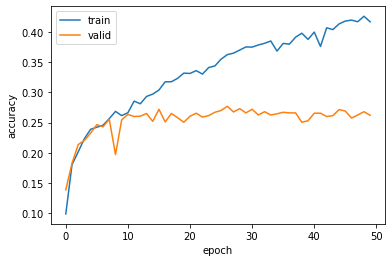

In [54]:
# Check overfit
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(hist.history["accuracy"], label="train")
plt.plot(hist.history["val_accuracy"], label="valid")
plt.legend()

(2000, 784)


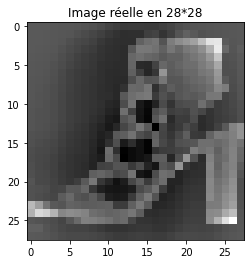

In [55]:
# Check prediction
index_test = 12

predictions = model.predict([X_test])
print(predictions.shape)
prediction = predictions[index_test]

plt.imshow(Y_test[index_test].reshape(28,28))
plt.title("Image réelle en 28*28")
plt.show()

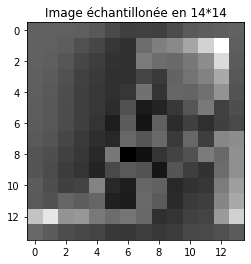

In [56]:
plt.imshow(X_test[index_test].reshape(14,14))
plt.title("Image échantillonée en 14*14")
plt.show()

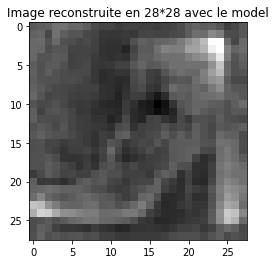

In [57]:
plt.imshow(prediction.reshape(28,28))
plt.title("Image reconstruite en 28*28 avec le model")
plt.show()

In [58]:
# Reconstruction plutot satisfaisante